# Importing Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from IPython.display import clear_output


Mounted at /content/drive


In [ ]:
!rm -r Dataset
!cp /content/drive/MyDrive/Dataset.zip /content/
!unzip Dataset.zip
!rm Dataset.zip


clear_output()

# Imports

In [ ]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt
import cv2


from sklearn.model_selection import train_test_split

from skimage import color
from skimage import io



import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import layers, optimizers

from tensorflow.keras.models import Model, load_model, Sequential

from tensorflow.keras.initializers import glorot_uniform

from tensorflow.keras.utils import plot_model

from tensorflow.keras.callbacks import ReduceLROnPlateau,\
                                         EarlyStopping, \
                                         ModelCheckpoint, \
                                         LearningRateScheduler

import tensorflow.keras.backend as K

from tensorflow.keras.layers import Conv2D, UpSampling2D,\
                                    BatchNormalization, \
                                    Activation, \
                                    MaxPool2D, \
                                    Conv2DTranspose, \
                                    Concatenate, Input

from tensorflow.keras.applications import MobileNetV2, VGG19
from tensorflow.keras.metrics import Recall, Precision



import random

import glob
from PIL import Image

# Read Data

In [ ]:
benign_path = '/content/Dataset/Breast scans/benign/'
malignant_path = '/content/Dataset/Breast scans/malignant/'
normal_path = '/content/Dataset/Breast scans/normal/'



In [ ]:
def create_dataframe(file_path):

    data = pd.DataFrame(columns=['image', 'mask'])
    
    for path in glob.glob(os.path.join(file_path, '*mask*.png')):

        img_name = path.split('/')[-1].split('_')[0]
        img_path = os.path.join(file_path, img_name + '.png')

        if os.path.exists(img_path):
            data = data.append({'image':img_path, 'mask':path}, ignore_index=True)
            

    return data

In [ ]:
benign_train = create_dataframe(benign_path + 'Train')
malignant_train = create_dataframe(malignant_path + 'Train')
normal_train = create_dataframe(normal_path + 'Train')


benign_test = create_dataframe(benign_path + 'Test')
malignant_test = create_dataframe(malignant_path + 'Test')
normal_test = create_dataframe(normal_path + 'Test')



clear_output()

In [ ]:
benign_train[benign_train[['image']].duplicated()]

,image,mask
76,/content/Dataset/Breast scans/benign/Train/benign (54).png,/content/Dataset/Breast scans/benign/Train/benign (54)_mask_1.png
99,/content/Dataset/Breast scans/benign/Train/benign (181).png,/content/Dataset/Breast scans/benign/Train/benign (181)_mask.png
152,/content/Dataset/Breast scans/benign/Train/benign (92).png,/content/Dataset/Breast scans/benign/Train/benign (92)_mask.png
196,/content/Dataset/Breast scans/benign/Train/benign (100).png,/content/Dataset/Breast scans/benign/Train/benign (100)_mask_1.png
197,/content/Dataset/Breast scans/benign/Train/benign (98).png,/content/Dataset/Breast scans/benign/Train/benign (98)_mask.png
199,/content/Dataset/Breast scans/benign/Train/benign (173).png,/content/Dataset/Breast scans/benign/Train/benign (173)_mask.png
243,/content/Dataset/Breast scans/benign/Train/benign (83).png,/content/Dataset/Breast scans/benign/Train/benign (83)_mask.png
268,/content/Dataset/Breast scans/benign/Train/benign (195).png,/content/Dataset/Breast scans/benign/Train/benign (195)_mask.png
302,/content/Dataset/Breast scans/benign/Train/benign (195).png,/content/Dataset/Breast scans/benign/Train/benign (195)_mask_1.png
326,/content/Dataset/Breast scans/benign/Train/benign (315).png,/content/Dataset/Breast scans/benign/Train/benign (315)_mask_1.png


In [ ]:
full_train_dataset = pd.concat([benign_train, malignant_train, normal_train], ignore_index=True)
full_train_dataset.sample(5)

,image,mask
307,/content/Dataset/Breast scans/benign/Train/benign (215).png,/content/Dataset/Breast scans/benign/Train/benign (215)_mask.png
351,/content/Dataset/Breast scans/benign/Train/benign (184).png,/content/Dataset/Breast scans/benign/Train/benign (184)_mask.png
291,/content/Dataset/Breast scans/benign/Train/benign (356).png,/content/Dataset/Breast scans/benign/Train/benign (356)_mask.png
531,/content/Dataset/Breast scans/malignant/Train/malignant (92).png,/content/Dataset/Breast scans/malignant/Train/malignant (92)_mask.png
256,/content/Dataset/Breast scans/benign/Train/benign (371).png,/content/Dataset/Breast scans/benign/Train/benign (371)_mask.png


In [ ]:
full_test_dataset = pd.concat([benign_test, malignant_test, normal_test], ignore_index=True)
full_test_dataset.sample(5)

,image,mask
37,/content/Dataset/Breast scans/benign/Test/benign (431).png,/content/Dataset/Breast scans/benign/Test/benign (431)_mask.png
18,/content/Dataset/Breast scans/benign/Test/benign (434).png,/content/Dataset/Breast scans/benign/Test/benign (434)_mask.png
45,/content/Dataset/Breast scans/malignant/Test/malignant (200).png,/content/Dataset/Breast scans/malignant/Test/malignant (200)_mask.png
47,/content/Dataset/Breast scans/malignant/Test/malignant (191).png,/content/Dataset/Breast scans/malignant/Test/malignant (191)_mask.png
51,/content/Dataset/Breast scans/malignant/Test/malignant (207).png,/content/Dataset/Breast scans/malignant/Test/malignant (207)_mask.png


# Image Datagenerator

In [ ]:
class CustomeDataGenerator(tf.keras.utils.Sequence):

    def __init__(self, data, x_col, y_col,
                 batch_size=32, input_size=(224, 224),
                 target_size=(224, 224), shuffle=True):
        

        if shuffle:
            self.df = data.sample(frac = 1)

        else:
            self.df = data.copy()

            
        self.X_col = x_col
        self.y_col = y_col
        self.batch_size = batch_size
        self.input_size = input_size
        self.target_size = target_size

        self.n_sample = self.df.shape[0]

    def __len__(self):

        return (self.n_sample // self.batch_size)


    def __getitem__(self, index):

        batches = self.df.iloc[index * self.batch_size:(index + 1) * self.batch_size]

        return self.get_data(batches)


    def get_data(self, batchs):
        
        x_paths = batchs[self.X_col]
        y_paths = batchs[self.y_col]

        input_batch = np.array([self.get_input(x) for x in  x_paths])
        
        output_batch = np.array([self.get_output(x) for x in  y_paths])


        return input_batch, output_batch


    def get_input(self, path):
        
        img = cv2.imread(path, cv2.IMREAD_COLOR) / 255.0

        # if img.ndim < 3:
        #     img = color.gray2rgb(img)

        return tf.image.resize(img, self.input_size).numpy()


    def get_output(self, path):

        img = img =  cv2.imread(path, cv2.IMREAD_GRAYSCALE)/ 225.0

        # if img.ndim > 2:
        #     img = color.rgb2gray(img)
        
        img = np.expand_dims(img, -1)


        return tf.image.resize(img, self.target_size).numpy()

In [ ]:


train_generator = CustomeDataGenerator(
                                        data=full_train_dataset,
                                        x_col="image",
                                        y_col="mask",
                                        target_size=(224, 224),
                                        batch_size=32,
                                         
                                    )



test_generator = CustomeDataGenerator(
                                        data=full_test_dataset,
                                        x_col="image",
                                        y_col="mask",
                                        target_size=(224, 224),
                                        batch_size=32,
                                    )

# Custome Matrix

In [ ]:
import tensorflow as tf

def dice_coefficient(y_true, y_pred, smooth=1):
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) + smooth)

def iou(y_true, y_pred, smooth=1):
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    union = tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) - intersection
    return (intersection + smooth) / (union + smooth)

# Custome Loss

In [ ]:
def dice_iou_loss(y_true, y_pred):
    """
    Custom loss function that combines the Dice coefficient and Intersection over Union (IoU) metrics.
    """
    epsilon = 1e-6
    
    # Flatten the true and predicted tensors
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    
    # Cast y_true_f and y_pred_f to float32
    y_true_f = K.cast(y_true_f, dtype='float32')
    y_pred_f = K.cast(y_pred_f, dtype='float32')
    
    # Calculate the Dice coefficient
    intersection = K.sum(y_true_f * y_pred_f)
    dice_coefficient = (2.0 * intersection + epsilon) / (K.sum(y_true_f) + K.sum(y_pred_f) + epsilon)
    
    # Calculate the IoU
    union = K.sum(y_true_f) + K.sum(y_pred_f) - intersection
    iou = (intersection + epsilon) / (union + epsilon)
    
    # Combine the Dice coefficient and IoU as the final loss
    loss = 1.0 - (dice_coefficient + iou) / 2.0
    
    return loss


# Model

In [ ]:
def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x
    
def build_vgg19_unet(input_shape):
    """ Input """
    inputs = Input(input_shape)

    """ Pre-trained VGG19 Model """
    vgg19 = VGG19(include_top=False, weights="imagenet", input_tensor=inputs)

    """ Encoder """
    s1 = vgg19.get_layer("block1_conv2").output         
    s2 = vgg19.get_layer("block2_conv2").output         
    s3 = vgg19.get_layer("block3_conv4").output         
    s4 = vgg19.get_layer("block4_conv4").output         

    """ Bridge """
    b1 = vgg19.get_layer("block5_conv4").output         

    """ Decoder """
    d1 = decoder_block(b1, s4, 512)                     
    d2 = decoder_block(d1, s3, 256)                     
    d3 = decoder_block(d2, s2, 128)                    
    d4 = decoder_block(d3, s1, 64)                      

    """ Output """
    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

    model = Model(inputs, outputs, name="VGG19_U-Net")
    return model

model = build_vgg19_unet((224,224,3))

model.summary()


80134624/80134624 [==============================] - 0s 0us/step
Model: "VGG19_U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 224, 224, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 224, 224, 64  36928       ['block1_conv1[0][0]']           
                       

In [ ]:

earlystopping = EarlyStopping(monitor='val_loss',
                              mode='min', 
                              verbose=1, 
                              patience=5
                             )


checkpointer = ModelCheckpoint(filepath="/content/drive/MyDrive/Models/breast_modelVGG16.h5", 
                               verbose=1, 
                               save_best_only=True
                              )


reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              mode='min',
                              verbose=1,
                              patience=5,
                              min_delta=0.0001,
                              factor=0.2
                             )    

In [ ]:

model.compile(
                optimizer=optimizers.Nadam(learning_rate=1e-4),
                loss=dice_iou_loss,
                metrics=[
                            Recall(),
                            Precision(),
                            dice_coefficient,
                            iou
                        ]
            )

In [ ]:
history = model.fit(train_generator, 
                  epochs = 100, 
                  validation_data = test_generator,
                  callbacks = [checkpointer, earlystopping, reduce_lr]
                 )

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 0.8386 - recall: 0.7686 - precision: 0.1204 - dice_coefficient: 0.2067 - iou: 0.1161
Epoch 1: val_loss improved from inf to 0.67491, saving model to /content/drive/MyDrive/Models/breast_model.h5
18/18 [==============================] - 104s 2s/step - loss: 0.8386 - recall: 0.7686 - precision: 0.1204 - dice_coefficient: 0.2067 - iou: 0.1161 - val_loss: 0.6749 - val_recall: 0.5565 - val_precision: 0.5457 - val_dice_coefficient: 0.4001 - val_iou: 0.2501 - lr: 1.0000e-04
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 0.7169 - recall: 0.8610 - precision: 0.2891 - dice_coefficient: 0.3518 - iou: 0.2145
Epoch 2: val_loss did not improve from 0.67491
18/18 [==============================] - 33s 2s/step - loss: 0.7169 - recall: 0.8610 - precision: 0.2891 - dice_coefficient: 0.3518 - iou: 0.2145 - val_loss: 0.7214 - val_recall: 0.9760 - val_precision: 0.1753 - val_dice_coefficient: 0.3472 - val_iou: 0.2101

# Calculate the Dimensions

In [ ]:
def calculate_mask_dimensions(mask):
    
    mask = mask.reshape(224,224)*255
    image = Image.fromarray(mask.astype('uint8'))
    image.save('output_image.jpg')
    mask =  cv2.imread('output_image.jpg', cv2.IMREAD_GRAYSCALE)

    # Apply thresholding to create a binary image
    _, thresh = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Check if contours are found
    if len(contours) == 0:
        print("No contours found.")
        return None, None

    # Get bounding box
    x, y, width, height = cv2.boundingRect(contours[0])

    # Check for valid dimensions
    if x < 0:
        x = 0
    if y < 0:
        y = 0
    if width < 0:
        width = 0
    if height < 0:
        height = 0

    return height, width


In [ ]:
custom_objects = {'dice_iou_loss': dice_iou_loss,'dice_coefficient': dice_coefficient,'iou': iou}


model = load_model("/content/drive/MyDrive/Models/breast_model.h5", custom_objects=custom_objects)

In [ ]:
def prediction(path_img, model):
    # making prediction
    #Creating a empty array of shape 1,256,256,1
    X = np.empty((1,224,224,3))
    
    #resizing the image and coverting them to array of type float64
    img =  cv2.imread(path_img, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (224,224))
    img = np.array(img, dtype=np.float64)

    # standardising the image
    img = img/225
    #converting the shape of image from 256,256,3 to 1,256,256,3
    X[0,] = img

    #make prediction of mask
    pred = model.predict(X) 

    return pred


# Visualization

In [ ]:
def visualization(pred_mask, path_img):


    fig, axs = plt.subplots(1, 2, figsize=(8, 12))

    # Resize the mask to match the shape of the img array
    img = cv2.imread(path_img)

    #resizing and coverting them to array of type float64
    img = cv2.resize(img,(224, 224))

    axs[0].title.set_text("breast MRI")
    axs[0].imshow(img)

     #resizing and coverting them to array of type float64
    pred_mask = pred_mask.reshape(224,224,1)
    pred_mask = cv2.resize(pred_mask,(224, 224))

    img_with_pred_mask = img.copy()
    mask_idx = np.where(pred_mask ==1)
     # Assign the desired color values to the masked positions in the image array
    img_with_pred_mask[mask_idx[0], mask_idx[1], :] = (255, 0, 0)

    axs[1].title.set_text("MRI with Predicated Mask")
    axs[1].imshow(img_with_pred_mask)



    fig.tight_layout()

# Test

In [ ]:
path_img = full_test_dataset['image'][10]
orginal_mask = full_test_dataset['mask'][10]
pred_mask = None

In [ ]:
pred_mask = np.round(prediction(path_img, model), 3)

pred_mask = (pred_mask > 0.99).astype('int')

1/1 [==============================] - 0s 23ms/step


In [ ]:
height, width = calculate_mask_dimensions(pred_mask)
print('height = ', height)
print('width = ', width)

height =  75
width =  87


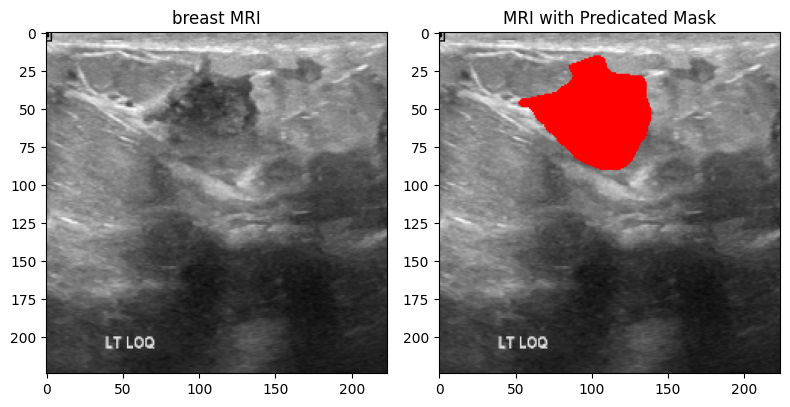

In [ ]:
visualization(pred_mask, path_img)

In [ ]:
def visualization_comparison(pred_mask, orginal_mask, path_img):


    fig, axs = plt.subplots(2, 2, figsize=(8, 12))

    # Resize the mask to match the shape of the img array
    img = cv2.imread(path_img)

    #resizing and coverting them to array of type float64
    img = cv2.resize(img,(224, 224))

    axs[0][0].title.set_text("Brain MRI")
    axs[0][0].imshow(img)

    # Resize the mask to match the shape of the img array
    mask = cv2.imread(orginal_mask)

    #resizing and coverting them to array of type float64
    mask = cv2.resize(mask,(224, 224))




    # Create a copy of the original image to avoid modifying the original data
    img_with_mask = img.copy()

    # Create a mask that selects the masked positions in the image array
    mask_idx = np.where(mask == 255)

    # Assign the desired color values to the masked positions in the image array
    img_with_mask[mask_idx[0], mask_idx[1], :] = (255, 0, 0)


    axs[0][1].title.set_text("MRI with Mask")
    axs[0][1].imshow(img_with_mask)


    axs[1][0].title.set_text("Brain MRI")
    axs[1][0].imshow(img)

     #resizing and coverting them to array of type float64
    pred_mask = pred_mask.reshape(224,224,1)
    pred_mask = cv2.resize(pred_mask,(224, 224))

    img_with_pred_mask = img.copy()
    mask_idx = np.where(pred_mask ==1)
     # Assign the desired color values to the masked positions in the image array
    img_with_pred_mask[mask_idx[0], mask_idx[1], :] = (255, 0, 0)

    axs[1][1].title.set_text("MRI with Predicated Mask")
    axs[1][1].imshow(img_with_pred_mask)



    fig.tight_layout()

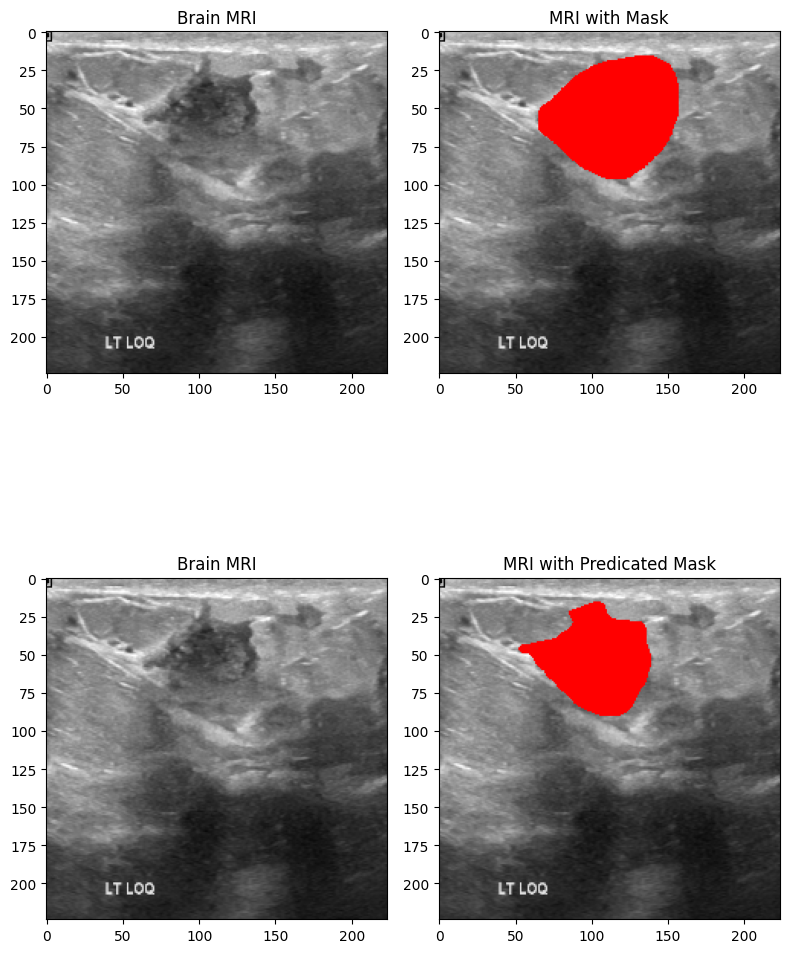

In [ ]:
visualization_comparison(pred_mask, orginal_mask, path_img)